# Example of using Xarray Accessor for ROMS

### Importing the libraries

In [1]:
import xroms

In [2]:
import xarray as xr

In [3]:
import numpy as np

### Loading the ROMS output files and the grid

Load all the daily output averages in a Xarray Dataset

In [4]:
ds = xr.open_mfdataset('/data/ecutolo/WMOP_OUTPUTS/WMOPv3.0_nesting/roms_WMOP_FORECAST_201805*_avg.nc')

load the grid file to proper compute the vertical coordinate

In [5]:
ds.xroms.load_grid('/data/ecutolo/WMOP_GRIDS/roms_grd_WMOPv3.0_new.nc')

Grid Data Loaded


### Play with  the dataset

Now I have the full dataset with also the variables related to the grid

In [ ]:
vort = ds.xroms.compute_vorticity()

I can create anothe dataset making a temporal average and also computing a zeta slice at 200m depth

In [8]:
ds_200slice = ds.mean('ocean_time').xroms.sel_zslice(-20)

/data/ecutolo/anaconda3/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/data/ecutolo/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/data/ecutolo/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


see how the <i>ocean_time</i> coordinate and <i>s_rho</i> one have disapeared

in facts now I can directly plot some variables

In [ ]:
ds_200slice.salt.plot()

and I can also select just a geographic region (lonmin,lonmax,latmin,latmax)

In [6]:
area_limits = (-5.8, 0, 34.9, 37.8)

In [11]:
ds.xroms.sel_geographic_area(area_limits)

<xarray.Dataset>
Dimensions:      (eta_psi: 150, eta_rho: 151, eta_u: 151, eta_v: 150, ocean_time: 29, s_rho: 32, s_w: 33, xi_psi: 242, xi_rho: 243, xi_u: 242, xi_v: 243)
Coordinates:
  * eta_rho      (eta_rho) int64 1 2 3 4 5 6 7 8 ... 145 146 147 148 149 150 151
  * xi_rho       (xi_rho) int64 1 2 3 4 5 6 7 8 ... 237 238 239 240 241 242 243
    lat_psi      (eta_psi, xi_psi) float64 34.93 34.93 34.93 ... 37.79 37.79
    lat_rho      (eta_rho, xi_rho) float64 34.92 34.92 34.92 ... 37.8 37.8 37.8
    lat_u        (eta_u, xi_u) float64 34.92 34.92 34.92 ... 37.8 37.8 37.8
    lat_v        (eta_v, xi_v) float64 34.93 34.93 34.93 ... 37.79 37.79 37.79
    lon_psi      (eta_psi, xi_psi) float64 -5.764 -5.74 ... -0.05 -0.02619
    lon_rho      (eta_rho, xi_rho) float64 -5.776 -5.752 ... -0.0381 -0.01429
    lon_u        (eta_u, xi_u) float64 -5.764 -5.74 -5.717 ... -0.05 -0.02619
    lon_v        (eta_v, xi_v) float64 -5.776 -5.752 -5.729 ... -0.0381 -0.01429
  * s_rho        (s_rho) float6

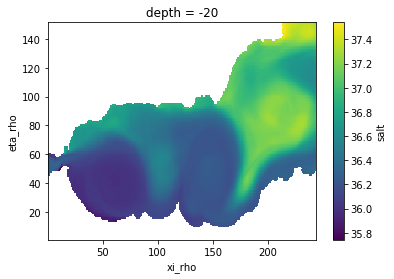

In [10]:
ds_200slice.xroms.sel_geographic_area(area_limits).salt.plot()

In [ ]:
ds_200slice_alboran = ds_200slice.xroms.sel_geographic_area(area_limits)

In [ ]:
ds_200slice_alboran.xroms.compute_vorticity().plot(vmax=2)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
(ds_200slice_alboran.u.xroms.move2grid('psi')**2+ds_200slice_alboran.v.xroms.move2grid('psi')**2).plot(vmax=0.5)

In [ ]:
plt.streamplot(ds_200slice.lon_psi.values,
               ds_200slice.lat_psi.values,
               ds_200slice.u.xroms.move2grid('psi').values,
               ds_200slice.v.xroms.move2grid('psi').values)